In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
alpha = 0.000000006

In [105]:
data = pd.read_csv('/home/shivanshu/Desktop/ML_implementation/insurance.csv')
data = data.replace('female',1)
data = data.replace('male',0)
data = data.replace('yes',1)
data = data.replace('no',0)
data = data.drop("region",axis=1)
(m,n) = data.shape
test = data[int(m*0.8):m].to_numpy()
test = np.transpose(test)
train = data[:int(m*0.8)].to_numpy()
train = np.transpose(train)
Y = train[-1:,:]
X = train[:-1,:]
(n,m) = X.shape
temp = np.ones(m)
temp = temp.reshape(1,m)
X = np.append(temp,X,axis=0)

In [106]:
def sigmoid(A):
    return 1/(1+np.exp(A))

In [107]:
def activate(theta,X):
    return np.transpose(theta)@X

In [108]:
def predict(X,theta):
    A = X
    for theta_t in theta:
        # print(A.shape,theta_t.shape)
        A = activate(theta_t,A)
    return A

In [109]:
def calculateCost(X,theta,Y):
    (n,m) = X.shape
    return sum(sum((predict(X,theta)-Y)**2))/2/m

In [110]:
theta1 = np.random.randn(6,6)
theta2 = np.random.randn(6,1)
print(X.shape)
predict(X,(theta1,theta2))
cost = calculateCost(X,(theta1,theta2),Y)

(6, 1070)


In [111]:
costs = []
costs.append(cost)
for i in range(2000):
    (n,m) = X.shape
    delta2 = np.transpose((predict(X,(theta1,theta2))-Y)@np.transpose(np.transpose(theta1)@X)/m)
    delta1 = X@(np.transpose(predict(X,(theta1,theta2))-Y))@np.transpose(theta2)
    theta1 = theta1 - alpha*delta1
    theta2 = theta2 - alpha*delta2
    cost = calculateCost(X,(theta1,theta2),Y)
    print(cost)
    # if cost > costs[-1]:
    #     print("DIVERGING")
    #     break
    costs.append(cost)

09.05314042
62771569.842343666
62769828.70754791
62768085.64520551
62766340.65176414
62764593.72366679
62762844.85735206
62761094.0492541
62759341.29580205
62757586.59342105
62755829.938531175
62754071.32754812
62752310.75688309
62750548.22294237
62748783.72212803
62747017.2508372
62745248.80546271
62743478.382392675
62741705.97801045
62739931.58869507
62738155.21082085
62736376.84075731
62734596.47486955
62732814.109518215
62731029.741058804
62729243.365842536
62727454.98021614
62725664.580521576
62723872.1630961
62722077.72427216
62720281.2603781
62718482.76773712
62716682.24266814
62714879.68148512
62713075.0804974
62711268.436010025
62709459.74432301
62707649.001731984
62705836.2045277
62704021.34899636
62702204.43141945
62700385.44807384
62698564.39523172
62696741.26916063
62694916.06612327
62693088.782378145
62691259.41417833
62689427.95777284
62687594.409405835
62685758.76531667
62683921.02174008
62682081.174906276
62680239.221040525
62678395.15636349
62676548.97709121
62674700.

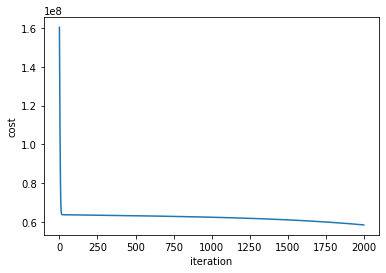

In [112]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iteration')
plt.show()

In [113]:
age,sex,bmi,children,smoker = 18,1,36.85,0,0
listp = [1,age,sex,bmi,children,smoker]
A = np.array(listp)
A = A.reshape(6,1)
predict(A,(theta1,theta2))

array([[9032.73320964]])